[0.6, 0.21, 0.31]
[0.62, 0.49, 0.55]
[0.58, 0.26, 0.36]
[0.52, 0.51, 0.52]
[0.51, 0.28, 0.36]
[0.17, 0.05, 0.08]
[0.46, 0.62, 0.53]
[0.47, 0.35, 0.4]
[0.58, 0.4, 0.47]
[0.64, 0.84, 0.73]
[0.37, 0.18, 0.24]
[0.79, 0.71, 0.75]
[0.71, 0.35, 0.47]
[0.07, 0.02, 0.03]
[0.74, 0.51, 0.61]
[0.7, 0.61, 0.65]
[0.15, 0.02, 0.04]
[0.65, 0.51, 0.57]
[0.32, 0.29, 0.3]
[0.4, 0.04, 0.07]
[0.27, 0.21, 0.23]
[0.71, 0.4, 0.51]
[0.74, 0.63, 0.68]
[0.57, 0.38, 0.45]
[0.38, 0.17, 0.24]
[0.3, 0.09, 0.14]
[0.47, 0.33, 0.39]
[0.34, 0.21, 0.26]
[0.61, 0.77, 0.68]
[0.76, 0.44, 0.56]
[0.57, 0.59, 0.58]
[0.65, 0.53, 0.59]
[0.6, 0.54, 0.57]
[0.44, 0.48, 0.46]
[0.65, 0.4, 0.49]
[0.67, 0.57, 0.61]
[0.65, 0.74, 0.69]
[0.64, 0.67, 0.65]
[0.5, 0.4, 0.45]
[0.87, 0.71, 0.78]
[0.62, 0.69, 0.65]
[0.48, 0.41, 0.44]
[0.6, 0.51, 0.55]
[0.39, 0.34, 0.36]
[0.31, 0.32, 0.31]
[0.21, 0.06, 0.1]
[0.59, 0.46, 0.51]
[0.3, 0.11, 0.16]
[0.5, 0.32, 0.39]
[0.59, 0.4, 0.48]
[0.68, 0.62, 0.64]
plotMat: [[0.6, 0.21, 0.31], [0.62, 0.49, 0.55],

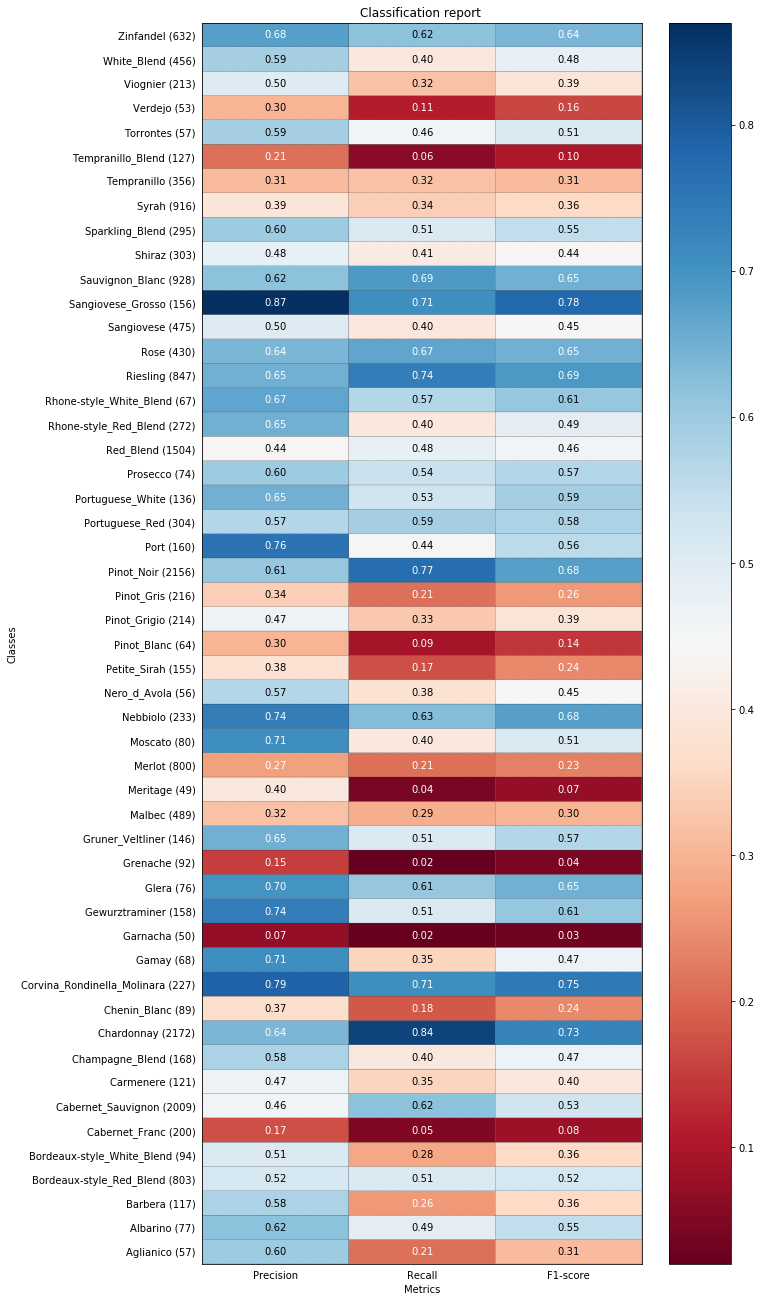

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# plot classification results 
def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    from itertools import izip
    pc.update_scalarmappable()
    ax = pc.get_axes()
    for p, color, value in izip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)

def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))


def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)


def main():
    sampleClassificationReport = """precision    recall  f1-score   support

                    Aglianico       0.60      0.21      0.31        57
                     Albarino       0.62      0.49      0.55        77
                      Barbera       0.58      0.26      0.36       117
     Bordeaux-style_Red_Blend       0.52      0.51      0.52       803
   Bordeaux-style_White_Blend       0.51      0.28      0.36        94
               Cabernet_Franc       0.17      0.05      0.08       200
           Cabernet_Sauvignon       0.46      0.62      0.53      2009
                    Carmenere       0.47      0.35      0.40       121
              Champagne_Blend       0.58      0.40      0.47       168
                   Chardonnay       0.64      0.84      0.73      2172
                 Chenin_Blanc       0.37      0.18      0.24        89
Corvina_Rondinella_Molinara       0.79      0.71      0.75       227
                        Gamay       0.71      0.35      0.47        68
                     Garnacha       0.07      0.02      0.03        50
               Gewurztraminer       0.74      0.51      0.61       158
                        Glera       0.70      0.61      0.65        76
                     Grenache       0.15      0.02      0.04        92
            Gruner_Veltliner        0.65      0.51      0.57       146
                       Malbec       0.32      0.29      0.30       489
                     Meritage       0.40      0.04      0.07        49
                       Merlot       0.27      0.21      0.23       800
                      Moscato       0.71      0.40      0.51        80
                     Nebbiolo       0.74      0.63      0.68       233
                 Nero_d_Avola       0.57      0.38      0.45        56
                 Petite_Sirah       0.38      0.17      0.24       155
                  Pinot_Blanc       0.30      0.09      0.14        64
                 Pinot_Grigio       0.47      0.33      0.39       214
                   Pinot_Gris       0.34      0.21      0.26       216
                   Pinot_Noir       0.61      0.77      0.68      2156
                         Port       0.76      0.44      0.56       160
               Portuguese_Red       0.57      0.59      0.58       304
             Portuguese_White       0.65      0.53      0.59       136
                     Prosecco       0.60      0.54      0.57        74
                    Red_Blend       0.44      0.48      0.46      1504
        Rhone-style_Red_Blend       0.65      0.40      0.49       272
      Rhone-style_White_Blend       0.67      0.57      0.61        67
                     Riesling       0.65      0.74      0.69       847
                         Rose       0.64      0.67      0.65       430
                   Sangiovese       0.50      0.40      0.45       475
            Sangiovese_Grosso       0.87      0.71      0.78       156
              Sauvignon_Blanc       0.62      0.69      0.65       928
                       Shiraz       0.48      0.41      0.44       303
              Sparkling_Blend       0.60      0.51      0.55       295
                        Syrah       0.39      0.34      0.36       916
                  Tempranillo       0.31      0.32      0.31       356
            Tempranillo_Blend       0.21      0.06      0.10       127
                    Torrontes       0.59      0.46      0.51        57
                      Verdejo       0.30      0.11      0.16        53
                     Viognier       0.50      0.32      0.39       213
                  White_Blend       0.59      0.40      0.48       456
                    Zinfandel       0.68      0.62      0.64       632

                  avg / total       0.53      0.54      0.53     19997"""


    plot_classification_report(sampleClassificationReport)
#     plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
#     plt.close()

if __name__ == "__main__":
    main()
    #cProfile.run('main()') # if you want to do some profiling